In [23]:
# ライブラリの読み込み
import os
import scipy as sp
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
# グラフをインラインで表示させる
%matplotlib inline
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')



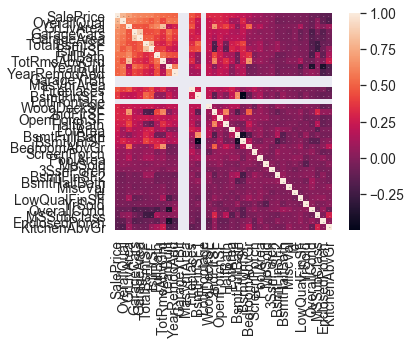

In [6]:
## 全体の相関 
corrmat = df_train.corr()

k = 80 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 1}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [7]:
cols = ['YearRemodAdd','GarageCars','GarageArea','SalePrice']
mytrain = df_train.loc[:,:'YearRemodAdd']
mytrain2 = df_train.loc[:,'1stFlrSF':'GarageCars']
mytrain = pd.concat([mytrain, mytrain2, df_train.SalePrice], axis=1)

mytrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,250000


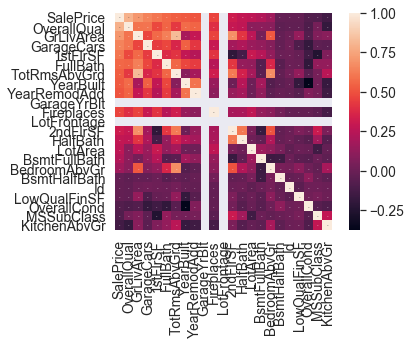

In [8]:
corrmat = mytrain.corr()

k = 30 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 1}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

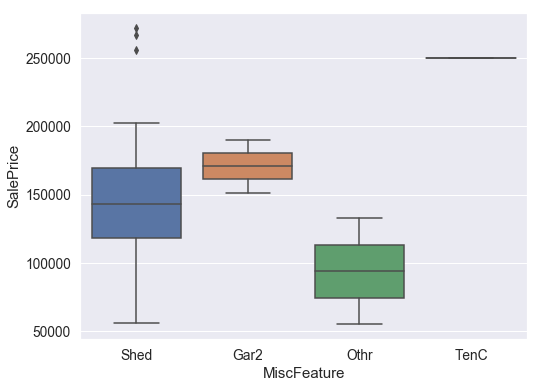

In [21]:
var = 'MiscFeature'
target = 'SalePrice'

data = pd.concat([df_train[target], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y=target, data=data)
fig.axis();


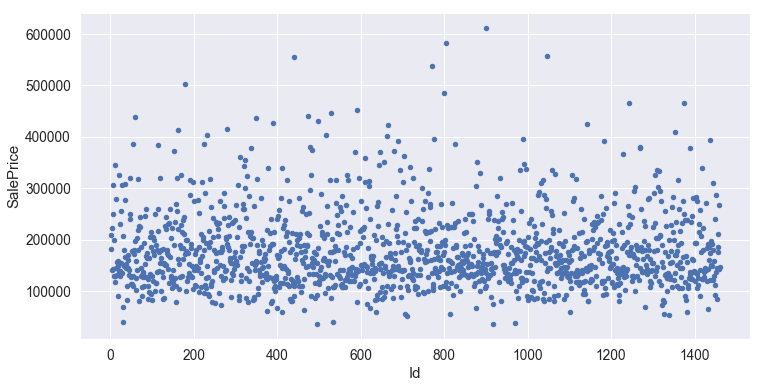

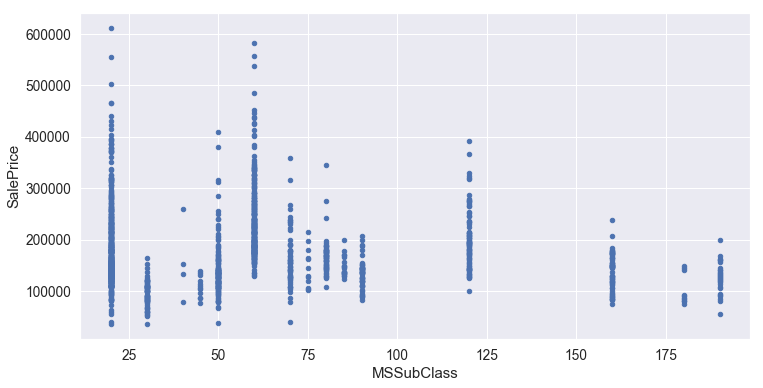

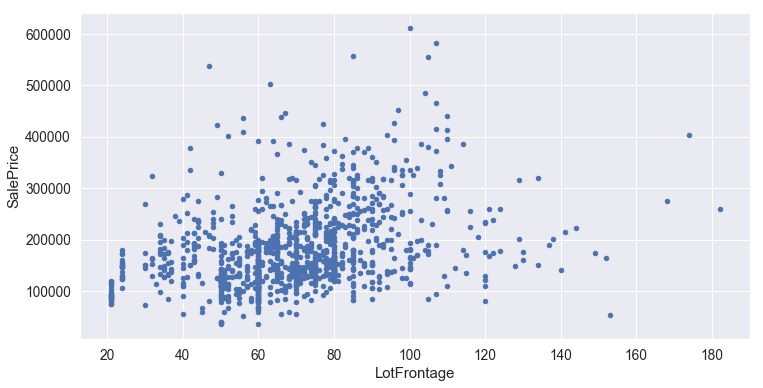

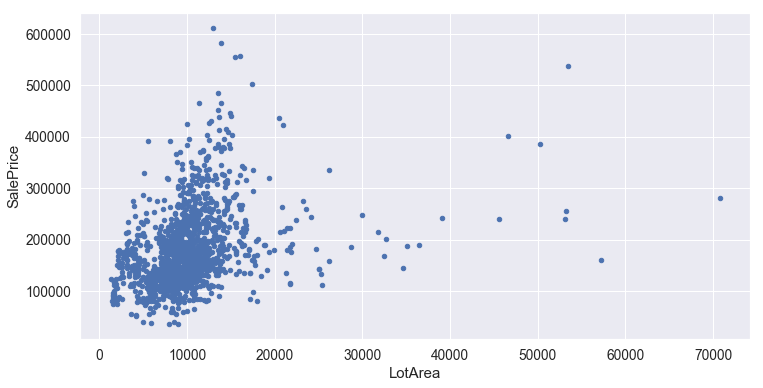

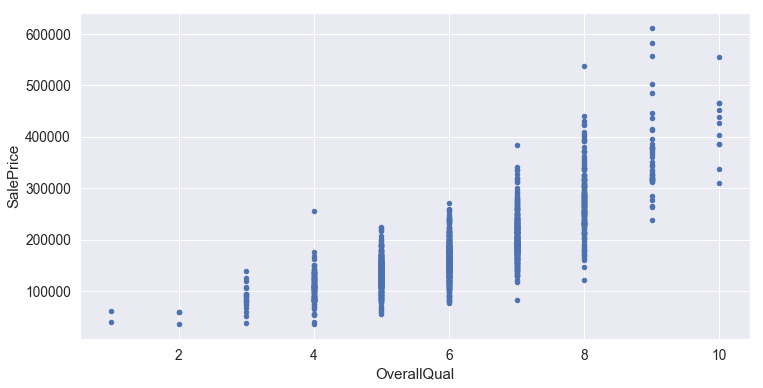

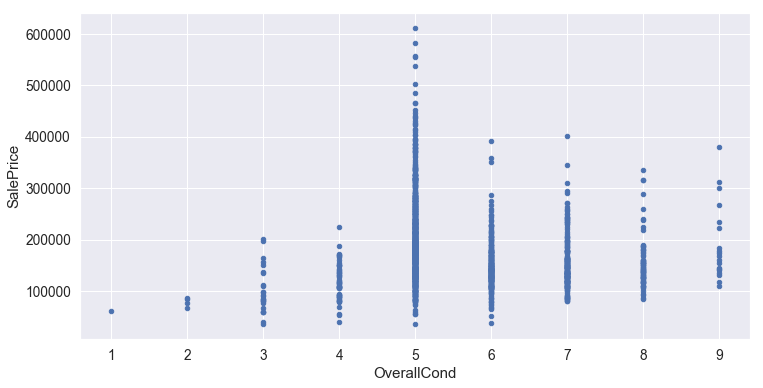

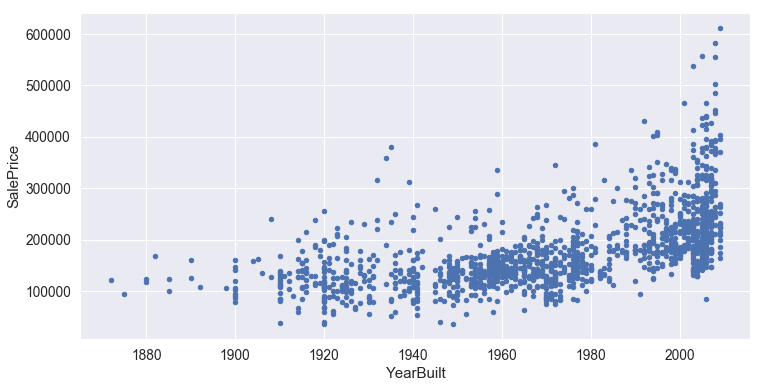

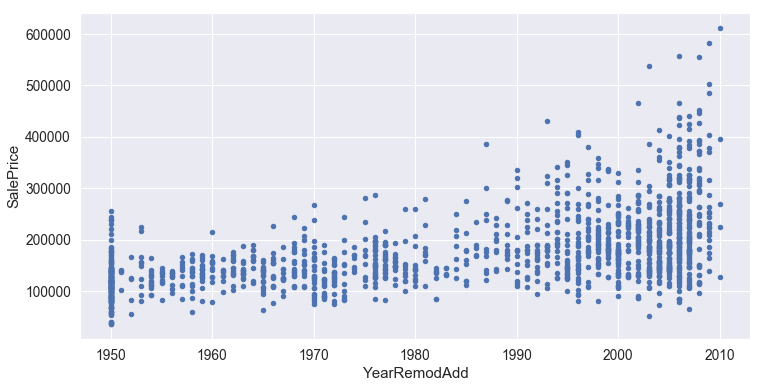

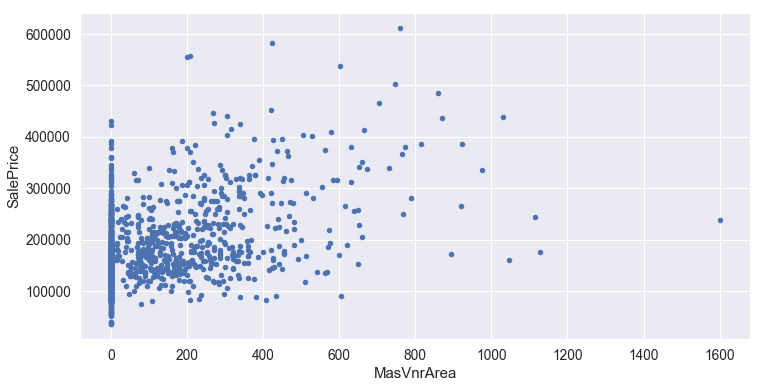

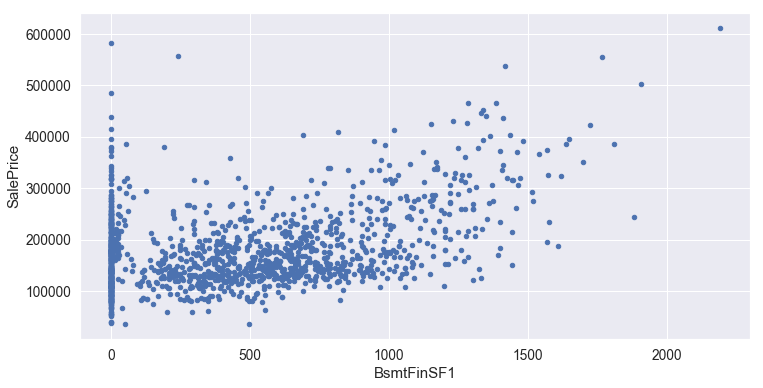

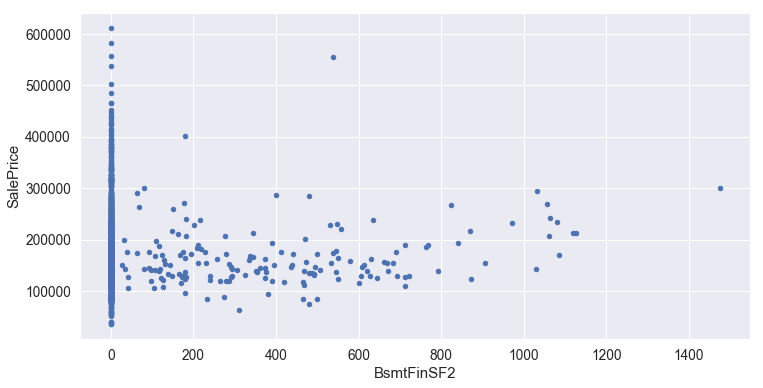

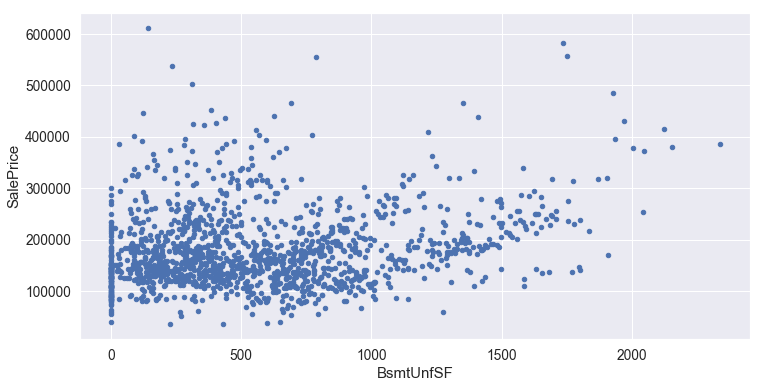

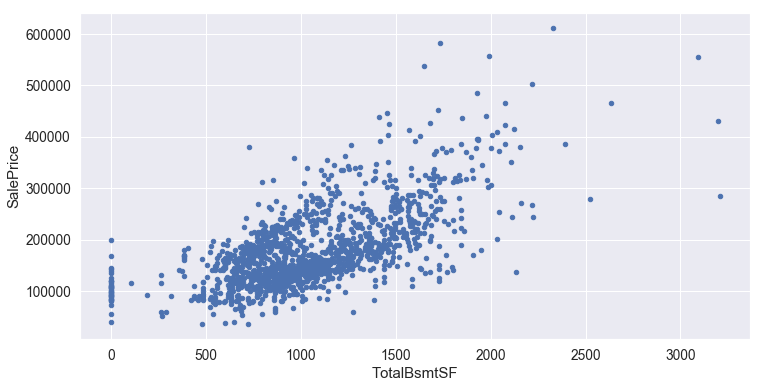

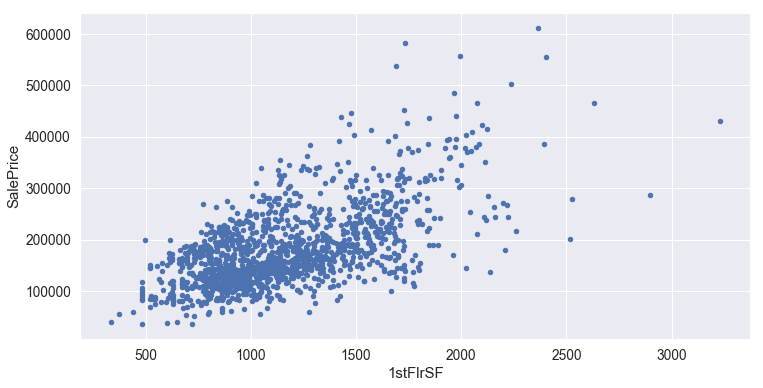

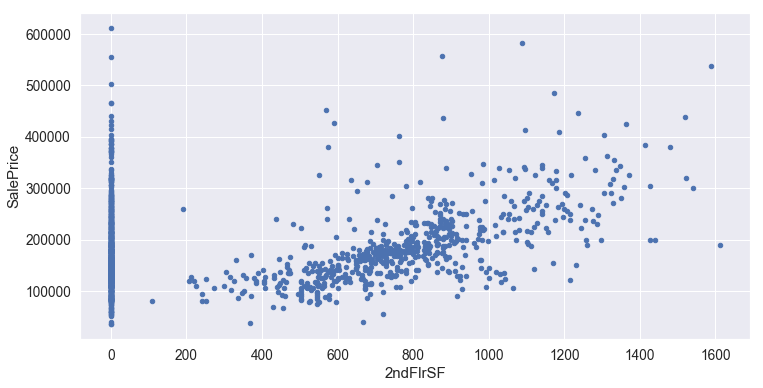

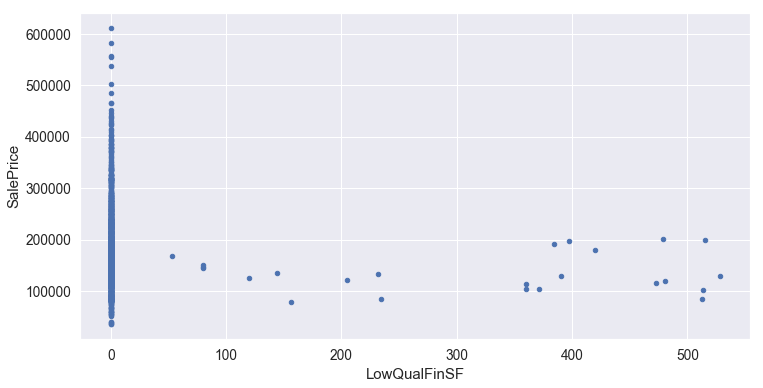

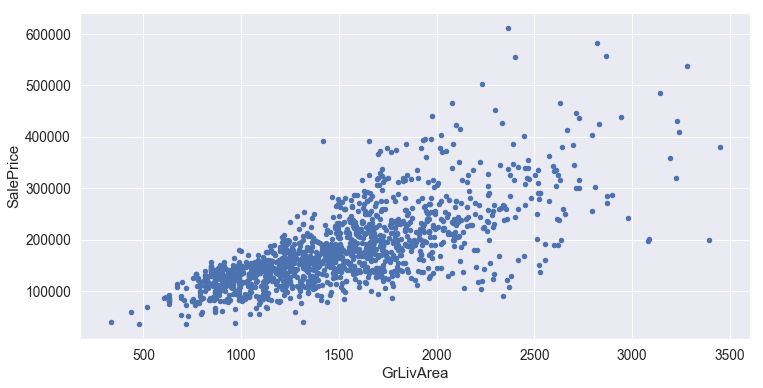

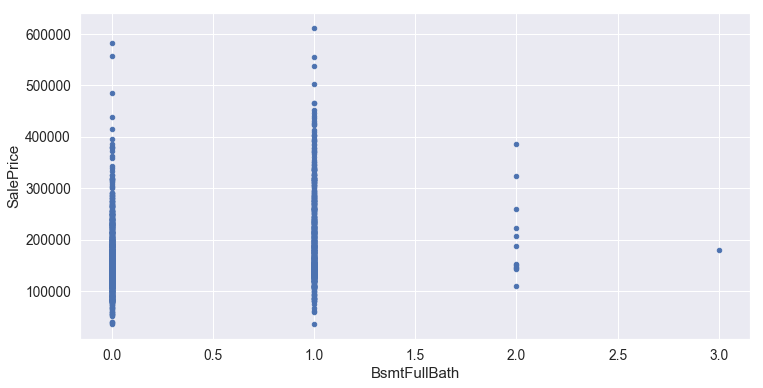

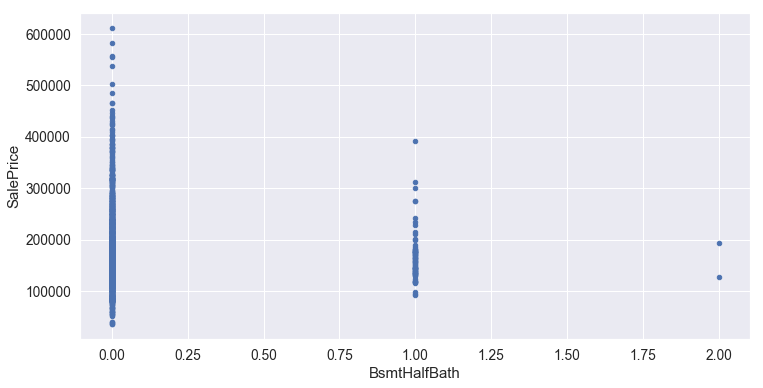

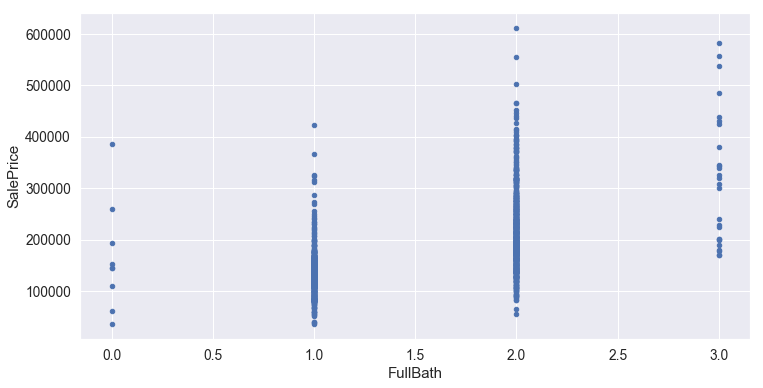

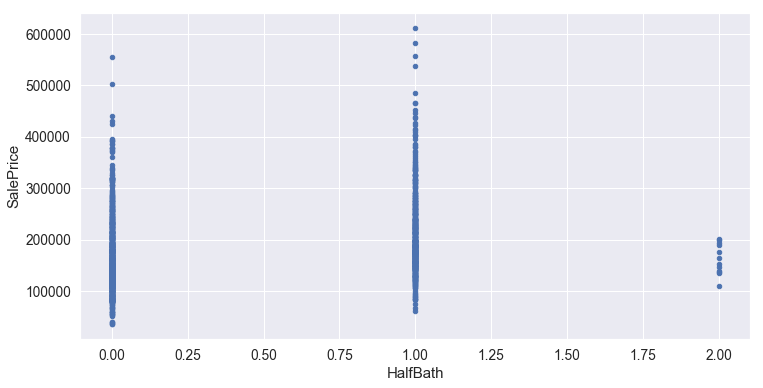

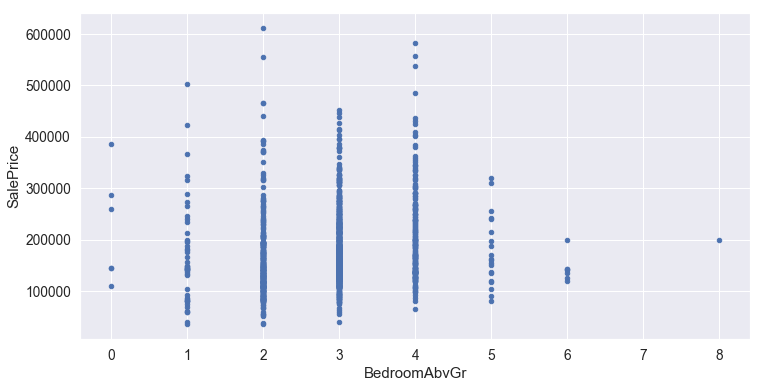

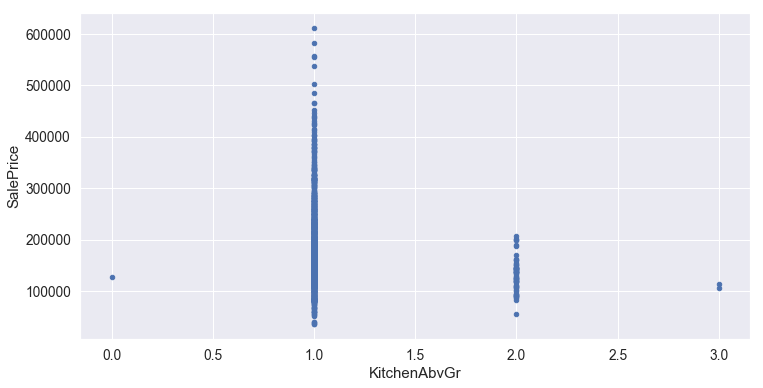

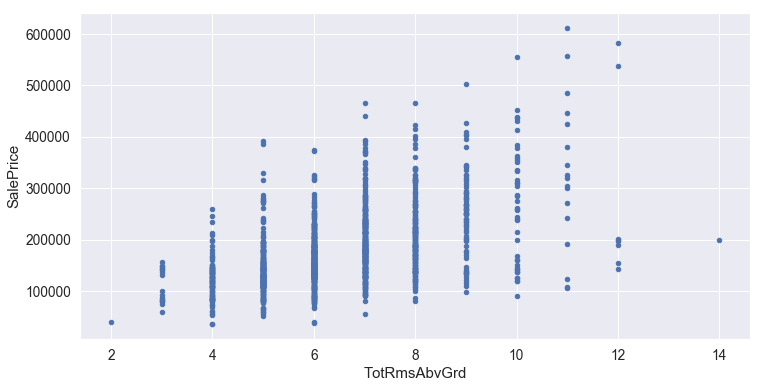

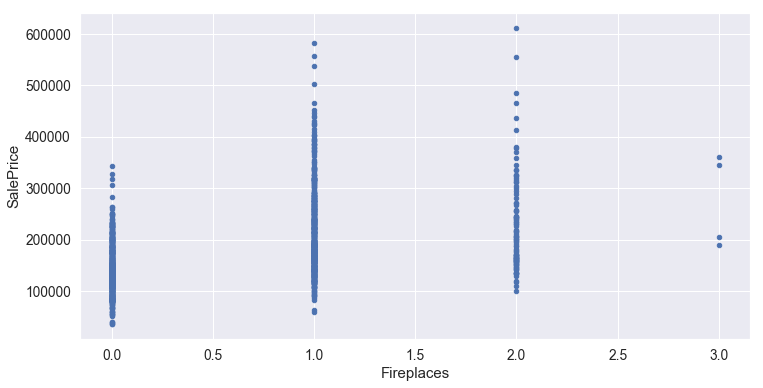

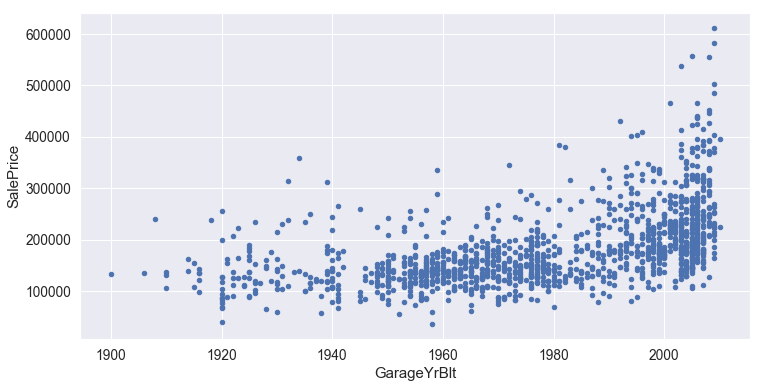

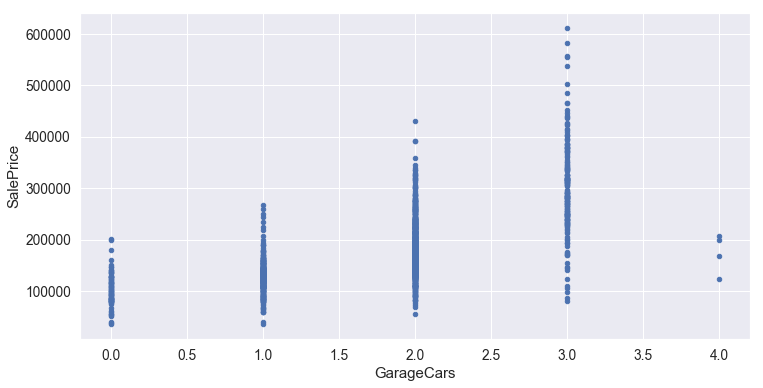

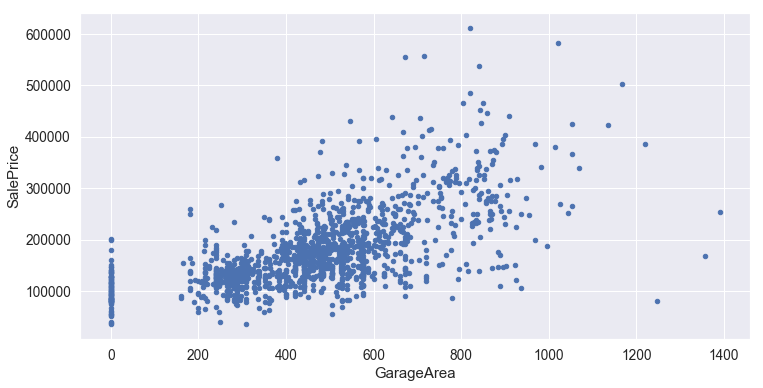

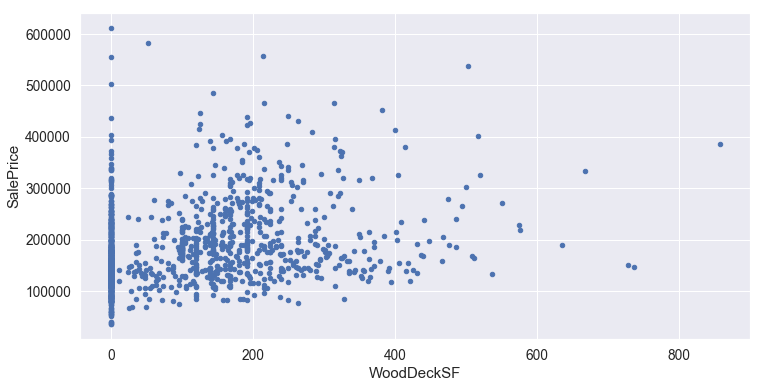

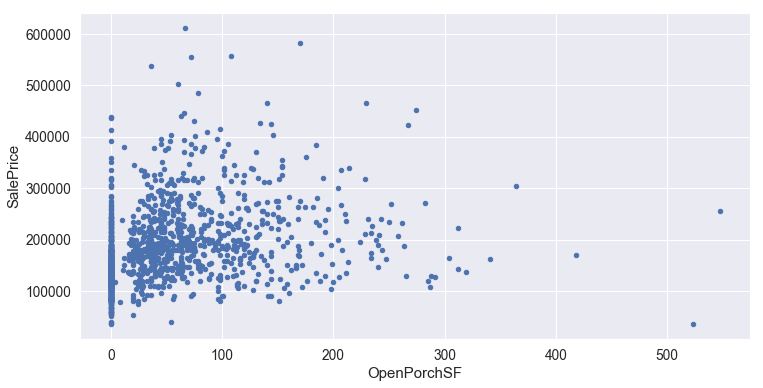

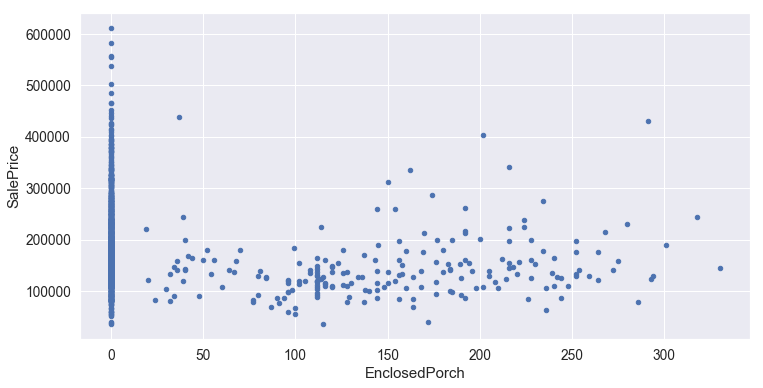

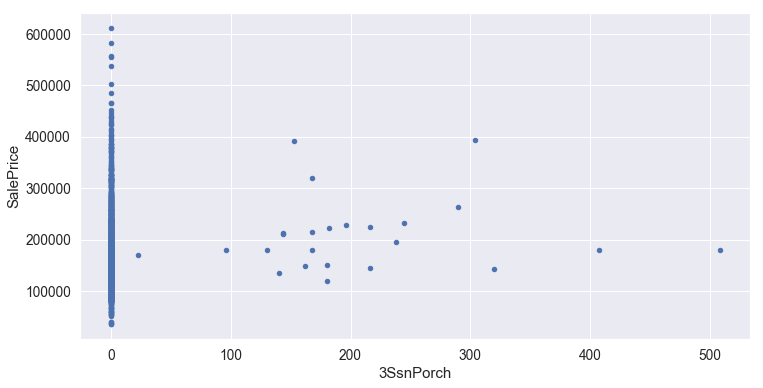

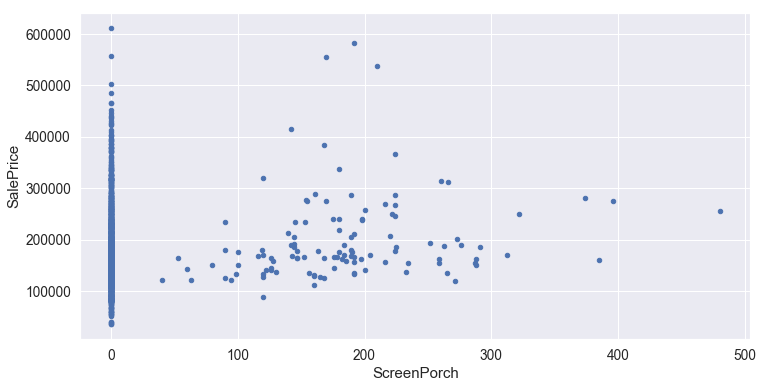

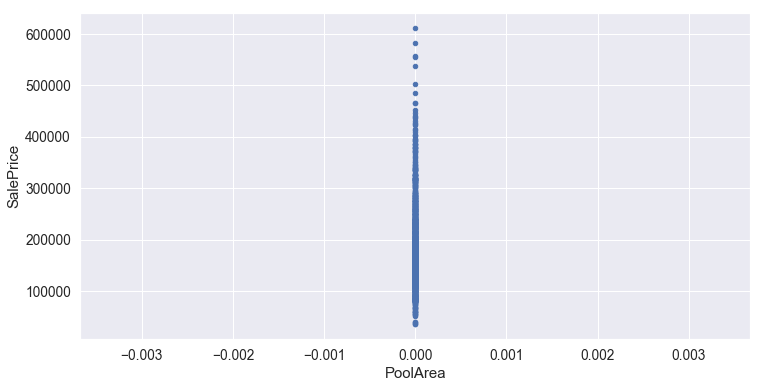

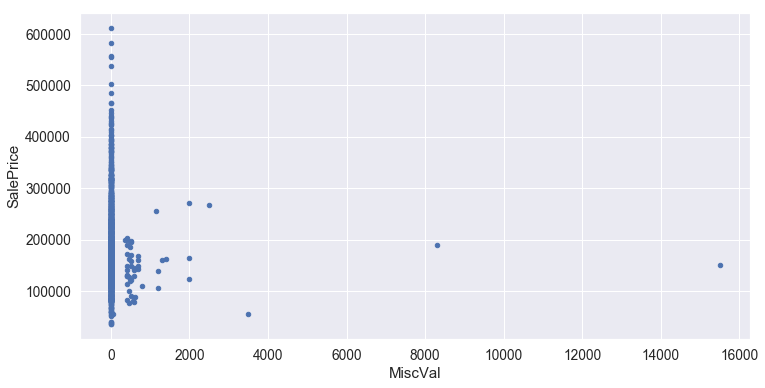

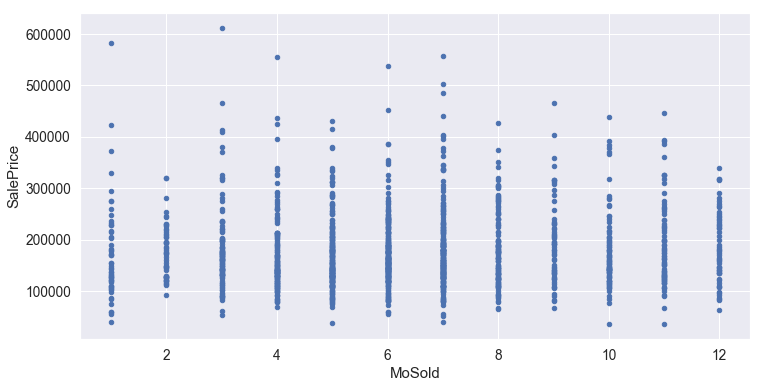

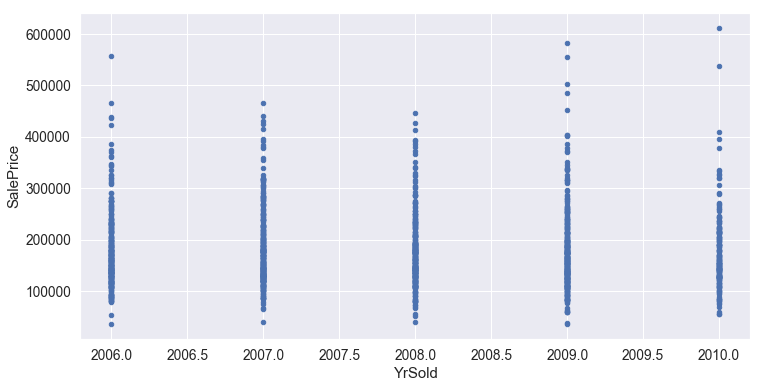

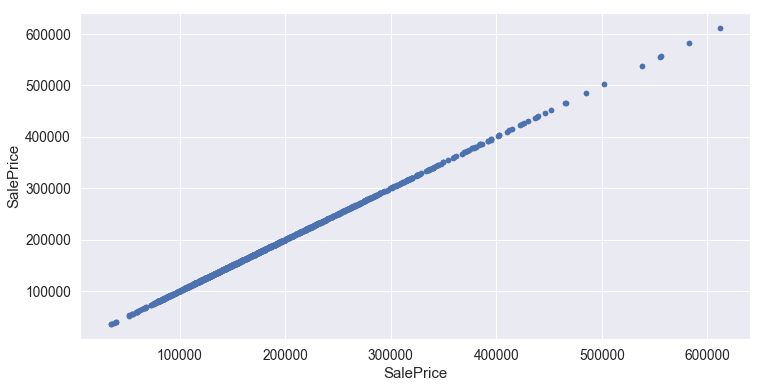

In [34]:
df_train = df_train[~((df_train['GrLivArea'] > 4000) & (df_train['SalePrice'] < 300000))]
df_train = df_train[~(df_train['LotFrontage'] > 250)]
#df_train = df_train[~(df_train['LotArea'] > 100000)]
#df_train = df_train[~((df_train['OverallQual'] == 10) & (df_train['SalePrice'] < 200000))]
df_train = df_train[~((df_train['OverallCond'] == 2) & (df_train['SalePrice'] > 300000))]
#df_train = df_train[~((df_train['OverallCond'] > 4) & (df_train['SalePrice'] > 700000))]
df_train = df_train[~((df_train['YearBuilt'] < 1900) & (df_train['SalePrice'] > 200000))]
df_train = df_train[~((df_train['YearRemodAdd'] < 2010) & (df_train['SalePrice'] > 600000))]
df_train = df_train[~(df_train['PoolArea'] > 500)]

num_df = df_train.select_dtypes(exclude=['object'])
#num_df = df.iloc[:, [1, 4, 17, 18, 19, 20, 43, 44, 46, 47, 51, 54, 56, 59, 61]]
num_df = num_df.fillna(-999)

target = 'SalePrice'
for i in num_df:
    var = i
    data = pd.concat([df_train[target], df_train[var]], axis=1)
    data.plot.scatter(x=var, y=target,figsize=(12,6))